## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from scipy.spatial import distance_matrix

%matplotlib inline

In [2]:
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('oceans16') # default
# set_nb_theme('monokai') # monokai
# set_nb_theme('grade3') # light

### Generate random data

In [3]:
# Generate data
X, y = make_blobs(n_samples=1600,
                  n_features=2,
                  centers=4,
                  cluster_std=1.2,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=2)  # For reproducibility

In [5]:
X.shape

(1600, 2)

## Visualize data
### Visualization helper

In [6]:
def plot_clusters(X, y, centers=None, ax=None):
    colors = cm.nipy_spectral(y.astype(float) / np.unique(y).shape[0])
    if ax is not None:
        ax.scatter(X[:, 0], X[:, 1], marker='.', lw=0, s=30, alpha=0.7,
                    c=colors, edgecolor='k')
        # Draw white circles at cluster centers
        if centers is not None:
            ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
            for i, c in enumerate(centers):
                ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=50, edgecolor='k')
    else:
        plt.scatter(X[:,0], X[:,1], c=colors, s=10)
        if centers is not None:
            plt.scatter(centers[:,0], centers[:,1], c='red', marker='*')

### Visualize

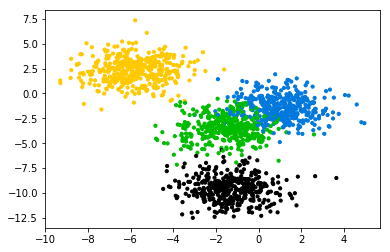

In [7]:
# Plot clusters
plot_clusters(X, y)

# Estimating k with silhouette plot
### Helpers

In [8]:
def configure_subplots(n_samples, n_clusters, silhouette_avg, cluster_labels):
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, n_samples + (n_clusters + 1) * 10])
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax2.set_yticks([])
    ax2.set_xticks([])
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    return ax1, ax2

In [9]:
def plot_silhouette(ax, i, cluster_labels, silhouette_scores, n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        silhouette_scores[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    return y_upper + 10  # 10 for the 0 samples

### Estimations

In [1]:
range_n_clusters = [8]

for n_clusters in range_n_clusters:
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Get silhouette average
    silhouette_avg = silhouette_score(X, y)
    
    # Configure subplots
    ax1, ax2 = configure_subplots(len(X), n_clusters, silhouette_avg, y)
    
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters, random_state=10)
    # Prepare fit and predict for data
    pred_cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, pred_cluster_labels)

    # Just a const to make graph look better
    y_lower = 10
    # Iterate over number of clusters
        # Plot silhouette and update y_lower value
    for i in range(n_clusters):
        y_lower = plot_silhouette(ax1, i, pred_cluster_labels, 
                                  sample_silhouette_values, n_clusters)
    
    # Get cluster centroids
    centers = clusterer.cluster_centers_
    # Plot clusters
    plot_clusters(X, pred_cluster_labels, centers, ax2)
# Show the graph
plt.show()

NameError: name 'silhouette_score' is not defined

# Estimating k with elbow plot
### Helpers

In [11]:
def plot_elbow(range_n_clusters, distortions):
    # Plot elbow graph
    plt.plot(range_n_clusters, distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

### Estimations

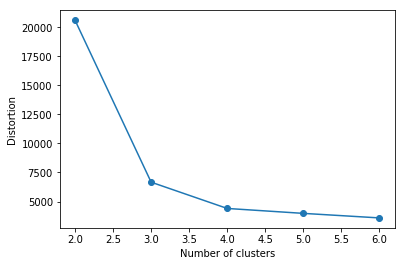

In [19]:
range_n_clusters = [2, 3, 4, 5, 6]

distortions = []

# Run algorithm with different number of clusters
for i in range_n_clusters:
    # Initialize clustering algorithm
    clusterer = KMeans(n_clusters=i, random_state=10)
    # Train the algorithm on data
    clusterer.fit(X)
    # Get within-cluster SSE and append to list of distortions
    distortions.append(clusterer.inertia_)
# Plot the elbow graph
plot_elbow(range_n_clusters, distortions)

# Estimating epsilon and number of neighbors for DBSCAN
### Helpers

In [20]:
def find_min_nonzero_dist(data_full, x):
    # Make every point the size of (1,2)
    dist_vect = distance_matrix(data_full, x.reshape(1,2))
    # Don't count if the distance is 0 - it may be the same point
    nonzero_elems = dist_vect[np.nonzero(dist_vect)]   
    return np.min(nonzero_elems)

In [21]:
def number_of_point_within_distance(data, dist):
    # Find number of closest neighbors around every point of data, 
    # that falls into a sphere of radius = dist
    result = np.array([])
    for x in data:
        dist_vect = distance_matrix(data, x.reshape(1, 2))
        filtered_elems = dist_vect[dist_vect <= dist]
        # -1 because the point has zero distance to itself, don't count it 
        count = filtered_elems.shape[0] - 1 
        result = np.append(result, count) 
    return result

### Estimations

(array([104., 229., 291., 278., 206., 128., 112.,  56.,  45.,  38.,  16.,
          9.,  16.,   8.,   6.,  12.,   7.,   6.,   5.,   4.,   1.,   1.,
          2.,   3.,   0.,   1.,   3.,   1.,   0.,   1.,   2.,   0.,   1.,
          0.,   0.,   1.,   5.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00146734, 0.02876424, 0.05606114, 0.08335804, 0.11065494,
        0.13795184, 0.16524874, 0.19254564, 0.21984254, 0.24713945,
        0.27443635, 0.30173325, 0.32903015, 0.35632705, 0.38362395,
        0.41092085, 0.43821775, 0.46551465, 0.49281155, 0.52010846,
        0.54740536, 0.57470226, 0.60199916, 0.62929606, 0.65659296,
        0.68388986, 0.71118676, 0.73848366, 0.76578056, 0.79307747,
        0.82037437, 0.84767127, 0.87496817, 0.90226507, 0.92956197,
        0.95685887, 0.98415577, 1.01145267, 1.03874957, 1.06604648,
        1.09334338, 1.12064028, 1.14793718, 1.17523408, 1.20253098,
        1.22982788, 1.25712478, 1.28442168, 1.

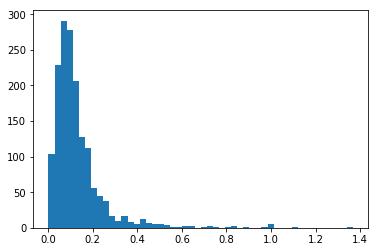

In [23]:
# Find distances to the closest points 
min_distances = np.apply_along_axis(lambda x: find_min_nonzero_dist(X, x), 
                                  axis=1,
                                  arr=X)
# Visualize distribution of distances to the closest neighbors
plt.hist(min_distances, bins=50)

In [24]:
# Most data lies under this threshold
epsilon = 0.4

In [25]:
# Find number of neighbors the lie within epsilon
num_points = number_of_point_within_distance(X, epsilon)

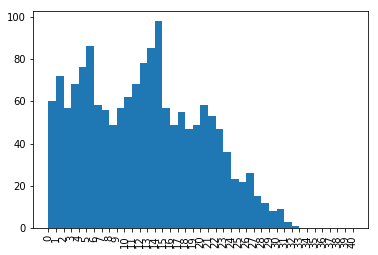

In [27]:
# Plot histogram of number of neighbors distribution
_, boundaries, _ = plt.hist(num_points, bins=40, range=(0, 40))
# Update ticks
plt.xticks(range(boundaries.shape[0]),
          boundaries.astype(int), 
          rotation=90)
# Show graph
plt.show()

In [30]:
# Select appropriate number of neighbors
min_pts = 6

In [31]:
# Create clustering model and get predictions
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
# Fit and predict on data
pred = dbscan.fit_predict(X)

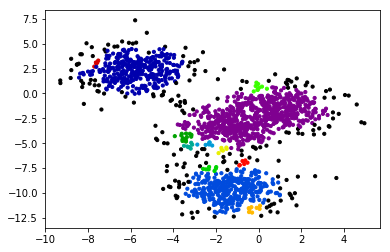

In [32]:
# Show the result
plot_clusters(X, pred+1)#шуми -1